In [1]:
import time
from nldg.utils import *
from adaXT.random_forest import RandomForest
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from experiments.bcd_test_runtime import assign_quadrant

In [6]:
dtr = gen_data_v6(n=1000, noise_std=0.5)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

In [7]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 13.181806223909755
Environment 1 MSE: 5.985511984704188
Environment 2 MSE: 1.5098758314189895


np.float64(13.181806223909755)

In [8]:
rf.modify_predictions_trees(Etr)  # n_jobs=2 to parallelize
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 9.309802763463583
Environment 1 MSE: 9.143744040842693
Environment 2 MSE: 3.178406865435695


np.float64(9.309802763463583)

In [9]:
rf.modify_predictions_trees(Etr, opt_method="extragradient")  # n_jobs=2 to parallelize
fitted_rf_3 = rf.predict(Xtr)
preds_rf_3 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_3, Etr, verbose=True)

Environment 0 MSE: 9.307042693449398
Environment 1 MSE: 9.169722618210187
Environment 2 MSE: 3.2084008659308583


np.float64(9.307042693449398)

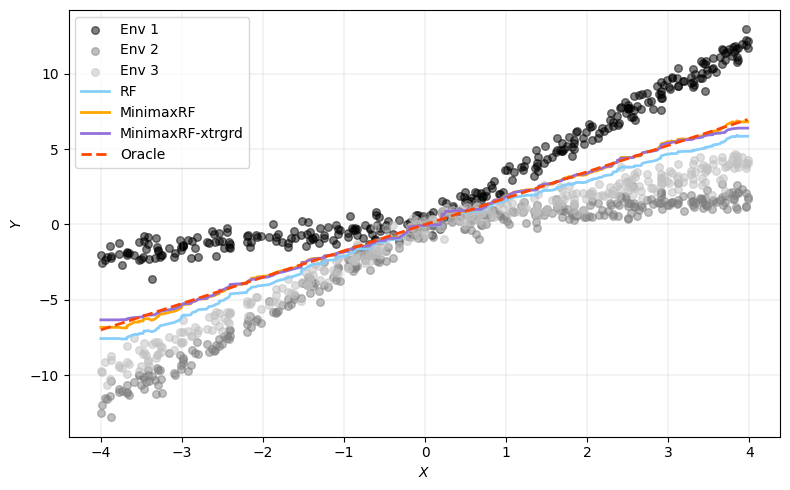

In [10]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_minmax_xtrgrd"] = preds_rf_3
plot_dtr(dtr, optfun=3)

In [2]:
dtr = gen_data_v7(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

In [3]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 0.6491252306459793
Environment 1 MSE: 0.9944854316638767
Environment 2 MSE: 0.17889046608446182


np.float64(0.9944854316638767)

In [9]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 0.7794879916148291
Environment 1 MSE: 0.791872266753139
Environment 2 MSE: 0.3396310277810282


np.float64(0.791872266753139)

In [10]:
rf.modify_predictions_trees(Etr, opt_method="extragradient")
fitted_rf_3 = rf.predict(Xtr)
preds_rf_3 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_3, Etr, verbose=True)

Environment 0 MSE: 0.7794879916148291
Environment 1 MSE: 0.791872266753139
Environment 2 MSE: 0.3396310277810282


np.float64(0.791872266753139)

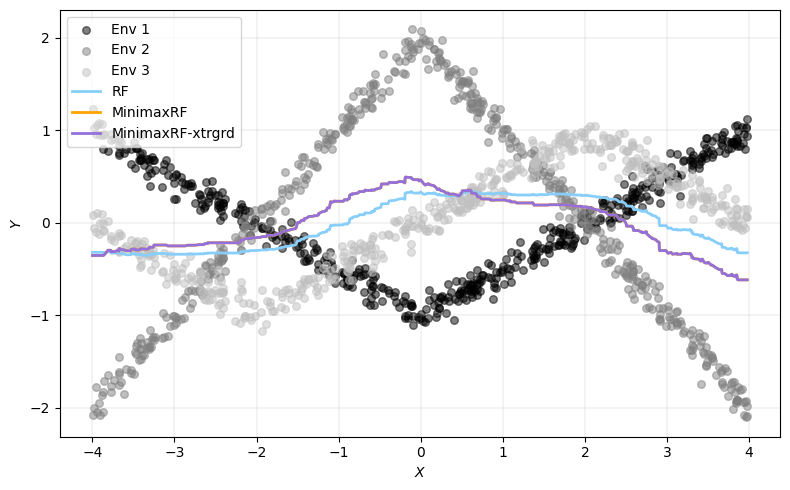

In [11]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_minmax_xtrgrd"] = preds_rf_3
plot_dtr(dtr)

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
Z = X[["Latitude", "Longitude"]]
X = X.drop(["Latitude", "Longitude"], axis=1)
env = assign_quadrant(Z)
n_estimators = 25
min_samples_leaf = 30
random_state = 42

In [10]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(X, y)

In [11]:
fitted_rf = rf.predict(X)
max_mse(y, fitted_rf, env, verbose=True)

Environment 0 MSE: 0.48655113551891316
Environment 1 MSE: 0.3763981201336164
Environment 2 MSE: 0.3912163609381252
Environment 3 MSE: 0.405833155424949


np.float64(0.48655113551891316)

In [12]:
mean_squared_error(y, fitted_rf)

0.38480567847408337

In [13]:
start = time.time()
rf.modify_predictions_trees(env, bcd=True, patience=1, block_size=15)
end = time.time()
print("Runtime BCD:", end-start)

Runtime BCD: 22.905285358428955


In [14]:
fitted_minimax_bcd = rf.predict(X)
max_mse(y, fitted_minimax_bcd, env, verbose=True)

Environment 0 MSE: 0.42784861647925554
Environment 1 MSE: 0.3844080076078675
Environment 2 MSE: 0.392960958593621
Environment 3 MSE: 0.4183931982202505


np.float64(0.42784861647925554)

In [15]:
mean_squared_error(y, fitted_minimax_bcd)

0.3901846580451994

In [16]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(X, y)
start = time.time()
rf.modify_predictions_trees(env)
end = time.time()
print("Runtime non-BCD:", end-start)

Runtime non-BCD: 27.206958770751953


In [17]:
fitted_minimax_nonbcd = rf.predict(X)
max_mse(y, fitted_minimax_nonbcd, env, verbose=True)

Environment 0 MSE: 0.4305618887372771
Environment 1 MSE: 0.3849660460051351
Environment 2 MSE: 0.3873507468408596
Environment 3 MSE: 0.4122442078878542


np.float64(0.4305618887372771)

In [18]:
mean_squared_error(y, fitted_minimax_nonbcd)

0.3879304940917196

Note that if the block size is larger than the number of leaves, the result of the block-coordinate descent (BCD) algorithm is the same as the non-BCD version.